In [1]:
%matplotlib inline
import matplotlib
from matplotlib import pyplot as plt
import microhapdb
import numpy
import pandas
import seaborn

In [2]:
m = microhapdb.markers
f = microhapdb.frequencies
pops = sorted(microhapdb.populations[microhapdb.populations.Source == '1KGP'].ID)

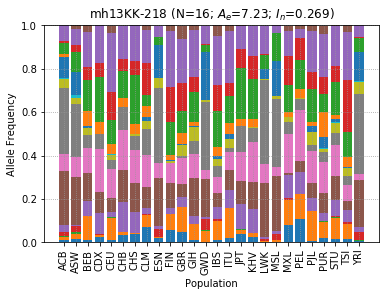

In [3]:
marker = 'mh13KK-218'
mdata = m[m.Name == marker].iloc[0]
alleles = f[f.Marker == marker].Allele.unique()
x = range(len(pops))
base_bars = [0.0] * len(pops)
for allele in alleles:
    bars = list()
    for population in pops:
        result = f[(f.Marker == marker) & (f.Population == population) & (f.Allele == allele)]
        freq = 0.0
        if len(result) > 0:
            assert len(result) == 1
            freq = result.Frequency.iloc[0]
        bars.append(freq)
    plt.bar(x, bars, 0.8, bottom=base_bars)
    base_bars = [a + b for a, b in zip(base_bars, bars)]
_ = plt.grid(linestyle=':', color='#999999')
_ = plt.xticks(x, pops, rotation=90)
_ = plt.xlabel('Population')
_ = plt.ylabel('Allele Frequency')
_ = plt.title(f'mh13KK-218 (N={len(alleles)}; $A_e$={mdata.AvgAe:.2f}; $I_n$={mdata.In:.3f})')

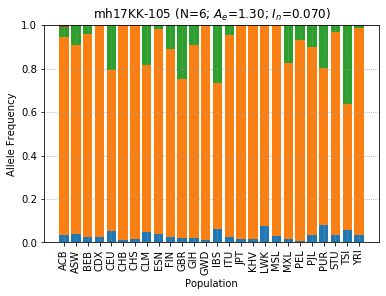

In [4]:
marker = 'mh17KK-105'
mdata = m[m.Name == marker].iloc[0]
alleles = f[f.Marker == marker].Allele.unique()
x = range(len(pops))
base_bars = [0.0] * len(pops)
for allele in alleles:
    bars = list()
    for population in pops:
        result = f[(f.Marker == marker) & (f.Population == population) & (f.Allele == allele)]
        freq = 0.0
        if len(result) > 0:
            assert len(result) == 1
            freq = result.Frequency.iloc[0]
        bars.append(freq)
    plt.bar(x, bars, 0.8, bottom=base_bars)
    base_bars = [a + b for a, b in zip(base_bars, bars)]
_ = plt.grid(linestyle=':', color='#999999')
_ = plt.xticks(x, pops, rotation=90)
_ = plt.xlabel('Population')
_ = plt.ylabel('Allele Frequency')
_ = plt.title(f'{marker} (N={len(alleles)}; $A_e$={mdata.AvgAe:.2f}; $I_n$={mdata.In:.3f})')

In [10]:
def plot_af(marker, axis, ylabel=False):
    mdata = m[m.Name == marker].iloc[0]
    alleles = f[f.Marker == marker].Allele.unique()
    base_bars = [0.0] * len(pops)
    for allele in alleles:
        bars = list()
        for population in pops:
            result = f[(f.Marker == marker) & (f.Population == population) & (f.Allele == allele)]
            freq = 0.0
            if len(result) > 0:
                assert len(result) == 1
                freq = result.Frequency.iloc[0]
            bars.append(freq)
        plt.bar(x, bars, 0.8, bottom=base_bars)
        base_bars = [a + b for a, b in zip(base_bars, bars)]
    _ = axis.grid(linestyle=':', color='#999999')
    _ = axis.set_xticks(x)
    _ = axis.set_xticklabels(pops, rotation=90)
    _ = axis.set_xlabel('Population')
    if ylabel:
        _ = axis.set_ylabel(ylabel)
    _ = axis.set_title(f'{marker} (N={len(alleles)}; $A_e$={mdata.AvgAe:.2f}; $I_n$={mdata.In:.3f})')

In [6]:
m[(m.In > 0.3) & (m.In < 0.4) & (m.Source != '10.1016/j.fsigen.2018.05.001')].sort_values('AvgAe')

,Name,PermID,Reference,Chrom,Offsets,AvgAe,In,Source
293,mh14KK-101,MHDBM-132db0af,GRCh38,chr14,"105543139,105543234",1.7532,0.3666,ALFRED
47,mh02KK-003,MHDBM-13b749ff,GRCh38,chr2,"108969856,108969914,108969980",2.1057,0.3022,ALFRED
297,mh15KK-058,MHDBM-d6c594d2,GRCh38,chr15,"28120284,28120471,28120586",2.2110,0.3799,ALFRED
326,mh16KK-062,MHDBM-69423f7f,GRCh38,chr16,"87468088,87468129,87468385",2.3563,0.3633,ALFRED
119,mh05KK-121,MHDBM-5f4e13a2,GRCh38,chr5,"33951720,33951955,33951986,33952000",2.5124,0.3663,ALFRED
179,mh09KK-020,MHDBM-13b503c9,GRCh38,chr9,"16795160,16795164,16795242,16795287",2.6851,0.3285,ALFRED
33,mh02USC-2pA,MHDBM-1734fe04,GRCh38,chr2,"10810991,10811035,10811042,10811069",2.7695,0.3702,10.1016/j.fsigen.2019.102213
18,mh01USC-1pD,MHDBM-8098d345,GRCh38,chr1,"106227453,106227475,106227487",3.1574,0.3706,10.1016/j.fsigen.2019.102213
166,mh08KK-039,MHDBM-5078e94d,GRCh38,chr8,"3659269,3659313,3659351,3659400,3659461,3659481",4.1595,0.3955,ALFRED
393,mh21KK-324,MHDBM-eb207470,GRCh38,chr21,"45294633,45294725,45294776,45294791",4.5506,0.3071,ALFRED


In [7]:
m[(m.AvgAe > 4.0) & (m.AvgAe < 4.5) & (m.Source != '10.1016/j.fsigen.2018.05.001')].sort_values('In')

,Name,PermID,Reference,Chrom,Offsets,AvgAe,In,Source
9,mh01KK-205,MHDBM-1f7eaca2,GRCh38,chr1,"18396197,18396218,18396306,18396351",4.0654,0.0717,ALFRED
117,mh05CP-010,MHDBM-df4e5f79,GRCh38,chr5,"17903164,17903183,17903208,17903213",4.4028,0.0803,ALFRED
247,mh12CP-008,MHDBM-003a7083,GRCh38,chr12,"1996655,1996658,1996688",4.1092,0.0918,ALFRED
279,mh13KK-223,MHDBM-4088f2e4,GRCh38,chr13,"110154351,110154394,110154411,110154504",4.0458,0.1173,ALFRED
60,mh02AT-07,MHDBM-eb83984f,GRCh38,chr2,"227227672,227227689,227227742",4.0513,0.1190,ISFG2019:P597
59,mh02KK-136,MHDBM-eb83984f,GRCh38,chr2,"227227672,227227689,227227742",4.0513,0.1190,ALFRED
385,mh21KK-315,MHDBM-e965ffea,GRCh38,chr21,"20507773,20507878,20507918",4.3647,0.1292,ALFRED
369,mh19USC-19qB,MHDBM-7b40359b,GRCh38,chr19,"53714387,53714389,53714413",4.0756,0.1368,10.1016/j.fsigen.2019.102213
265,mh13KK-213,MHDBM-d5615acf,GRCh38,chr13,"23191401,23191495,23191541",4.0188,0.1518,ALFRED
281,mh13USC-13qD,MHDBM-780fecae,GRCh38,chr13,"111435605,111435617,111435623,111435672",4.2401,0.1535,10.1016/j.fsigen.2019.102213


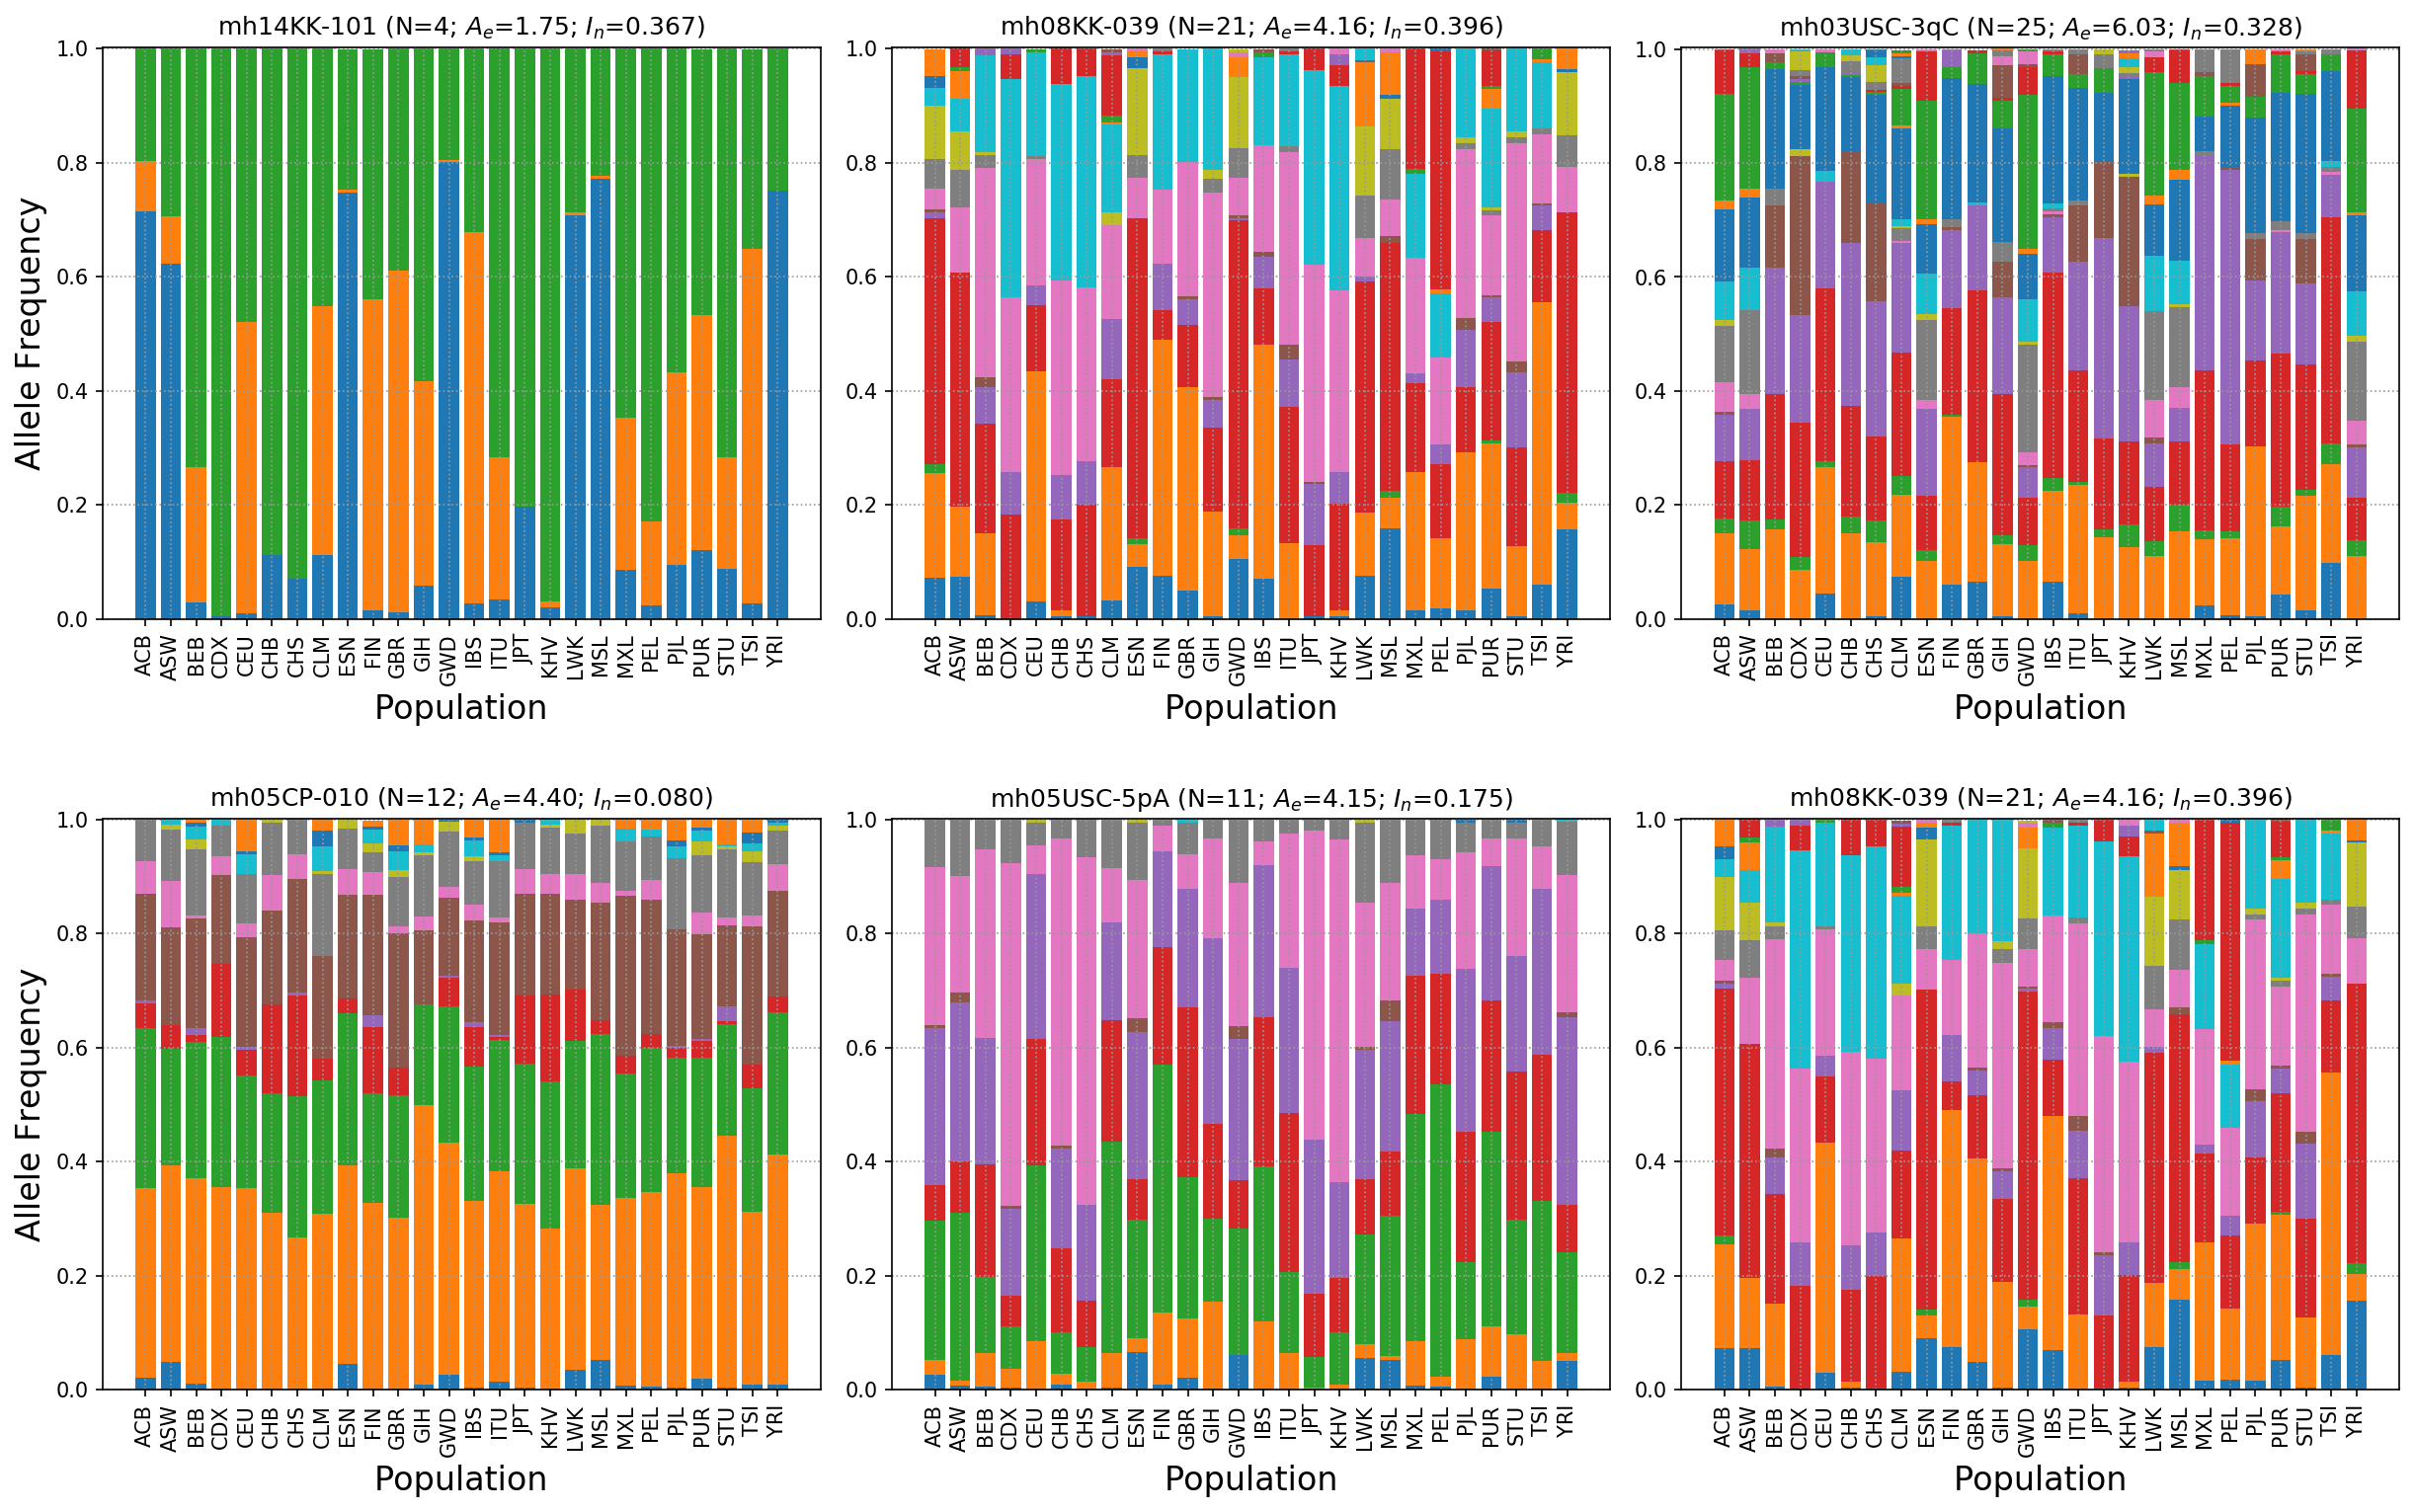

In [12]:
matplotlib.rcParams['axes.labelsize'] = 16
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(20, 12), dpi=150, sharex='col', sharey='row')
fig.patch.set_facecolor('white')

markers_to_plot = [
    'mh14KK-101', 'mh08KK-039', 'mh03USC-3qC',
    'mh05CP-010', 'mh05USC-5pA', 'mh08KK-039',
]
for i, marker in enumerate(markers_to_plot):
    axis = plt.subplot(2, 3, i + 1)
    ylabel = 'Allele Frequency' if i in (0, 3) else False
    plot_af(marker, axis, ylabel=ylabel)

plt.subplots_adjust(hspace=0.35, wspace=0.1)